In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
modalities = ["Sound", "Images", "SDF", "NeRF", "Helmholtz"]
layer_type = ["WIRE", "SIREN", "Gaussian"]
hyper_params = [0.1, 1, 5, 10, 17.5, 25, 37.5, 50]
encodings = ["None", "Basic", "Positional", "Gaussian", "Integer"]

lh = [f"{l} {h}" for l in layer_type for h in hyper_params]
combinations = [f"{e} {l} {h}" for e in encodings for l in layer_type for h in hyper_params]

gen_data = np.random.uniform(0, 1, (len(modalities), len(combinations)))

ntk_data = np.random.uniform(0, 1, (len(layer_type), len(hyper_params)))




df = pd.DataFrame(gen_data, columns=combinations, index=modalities)
df.head()

,None WIRE 0.1,None WIRE 1,None WIRE 5,None WIRE 10,None WIRE 17.5,None WIRE 25,None WIRE 37.5,None WIRE 50,None SIREN 0.1,None SIREN 1,...,Integer SIREN 37.5,Integer SIREN 50,Integer Gaussian 0.1,Integer Gaussian 1,Integer Gaussian 5,Integer Gaussian 10,Integer Gaussian 17.5,Integer Gaussian 25,Integer Gaussian 37.5,Integer Gaussian 50
Sound,0.793745,0.584956,0.990169,0.660553,0.996187,0.310671,0.453623,0.281204,0.828266,0.099480,...,0.153883,0.846690,0.334620,0.530071,0.260050,0.392923,0.587712,0.333656,0.018374,0.692226
Images,0.202498,0.318311,0.841436,0.369628,0.131219,0.158015,0.999909,0.234353,0.863856,0.836029,...,0.479640,0.088687,0.894491,0.917501,0.541132,0.005104,0.017215,0.629289,0.998843,0.731120
SDF,0.945007,0.900909,0.295549,0.940884,0.220703,0.731894,0.813035,0.235631,0.375391,0.271195,...,0.234549,0.198700,0.409933,0.927127,0.446969,0.607344,0.802019,0.041127,0.895239,0.063448
NeRF,0.810488,0.062384,0.197536,0.512658,0.404481,0.534117,0.432624,0.032573,0.577021,0.915706,...,0.665298,0.179594,0.969180,0.745460,0.819345,0.872751,0.590640,0.171618,0.260683,0.327492
Helmholtz,0.922990,0.549884,0.324893,0.279915,0.200266,0.947336,0.581428,0.902342,0.509111,0.278603,...,0.026740,0.922976,0.983547,0.403696,0.891710,0.384697,0.783480,0.405567,0.422523,0.629425


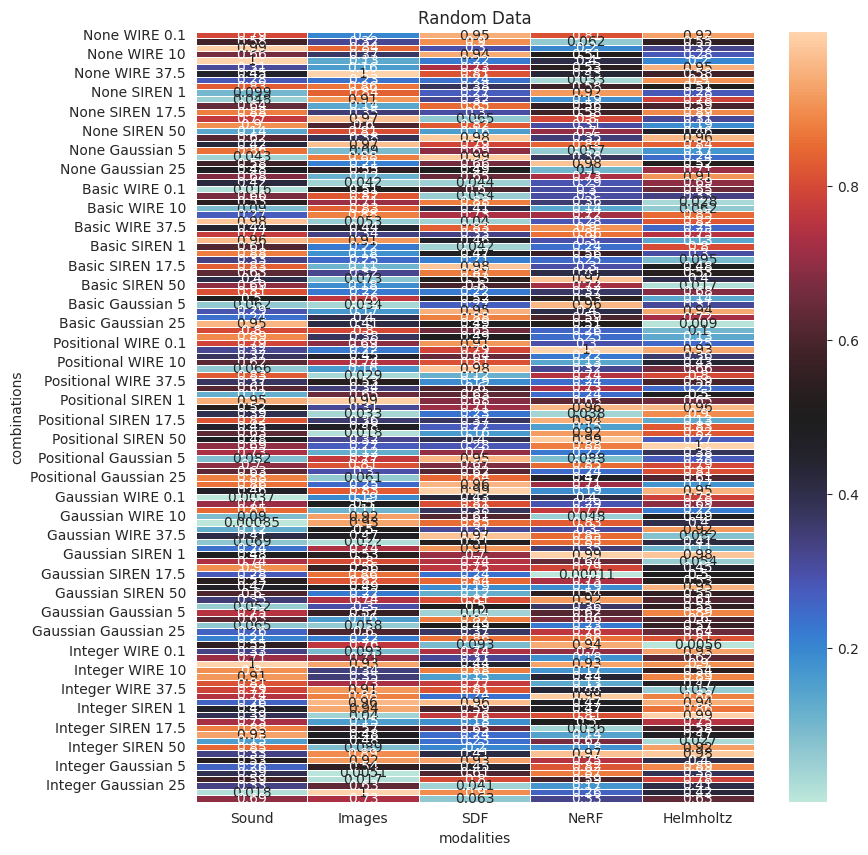

In [37]:
# sns.color_palette("icefire", as_cmap=True)

def heatmap(data, title, xlabel="modalities", ylabel="combinations"):
    f, ax = plt.subplots(figsize=(9, 10))
    sns.heatmap(data.T, annot=True, linewidths=.5, ax=ax, cmap="icefire")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
heatmap(df, "Random Data")

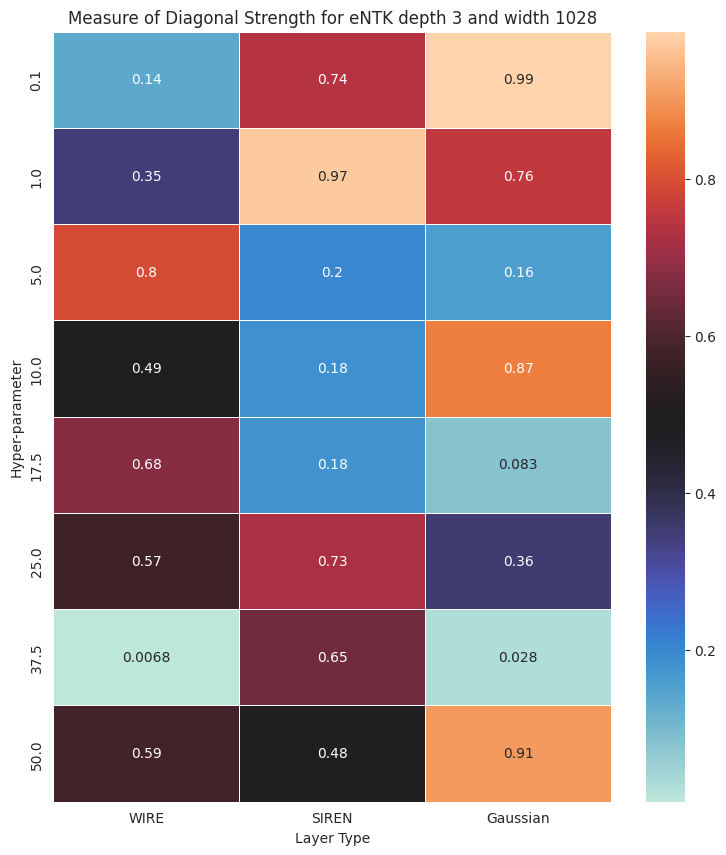

In [38]:

ntk_df = pd.DataFrame(ntk_data, columns = hyper_params, index=layer_type)
heatmap(ntk_df, "Measure of Diagonal Strength for eNTK depth 3 and width 1028", "Layer Type", "Hyper-parameter")